In [1]:
import fastf1
session = fastf1.get_session(2022, 'Monza', 'Q')
session.load(telemetry=False, laps=False, weather=False)
vettel = session.get_driver('BOT')
print(f"Pronto {vettel['FirstName']}?")

ModuleNotFoundError: No module named 'fastf1'

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2019/14/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\molly\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py", line 467, in _make_request
    self._validate_conn(conn)
  File "C:\Users\molly\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py", line 1099, in _validate_conn
    conn.connect()
  File "C:\Users\molly\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connection.py", line 653, in connect
    sock_and_verified = _ssl_wrap_socket_and_match_hostname(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\molly\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connection.py", lin

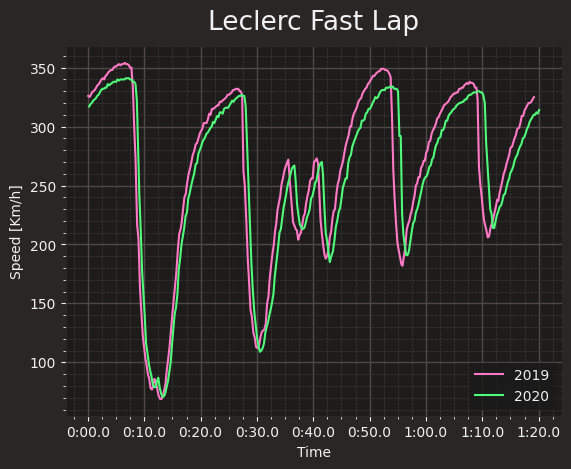

In [6]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl()

session = fastf1.get_session(2019, 'Monza', 'Q')

session.load()
fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

session2 = fastf1.get_session(2020, 'Monza', 'Q')

session2.load()
fast_leclerc2 = session2.laps.pick_driver('LEC').pick_fastest()
lec_car_data2 = fast_leclerc2.get_car_data()
t2 = lec_car_data2['Time']
vCar2 = lec_car_data2['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='2019')
ax.plot(t2 , vCar2, label='2020')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc Fast Lap')
ax.legend()
plt.show()

In [18]:
import matplotlib.pyplot as plt

import fastf1.plotting


# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# load a session and its telemetry data
session = fastf1.get_session(2022, 'Spanish Grand Prix', 'Q')
session.load()
session2 = fastf1.get_session(2023, 'Spanish Grand Prix', 'Q')
session2.load()

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '55', '63', '11', '44', '77', '20', '3',

In [19]:
fastest_lap = session.laps.pick_fastest()
car_data = fastest_lap.get_car_data().add_distance()

fastest_lap2 = session2.laps.pick_fastest()
car_data2 = fastest_lap2.get_car_data().add_distance()

In [20]:
circuit_info = session.get_circuit_info()
# should be the same circuit, but pretty sure this is the year they changed the chicane so...
circuit_info2 = session2.get_circuit_info()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


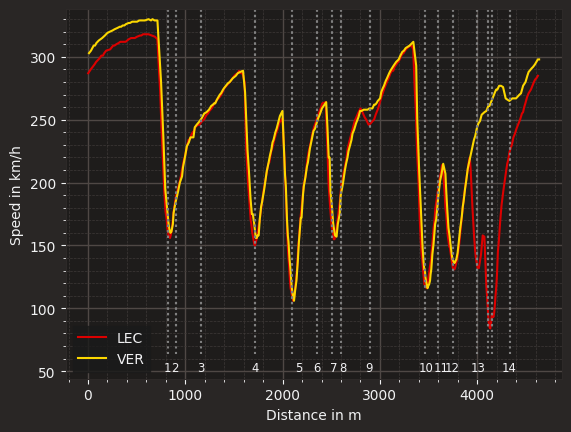

In [21]:
team_color = fastf1.plotting.team_color(fastest_lap['Team'])
team_color2 = fastf1.plotting.team_color(fastest_lap2['Team'])

fig, ax = plt.subplots()
ax.plot(car_data['Distance'], car_data['Speed'],
        color=team_color, label=fastest_lap['Driver'])
ax.plot(car_data2['Distance'], car_data2['Speed'],
        color=team_color2, label=fastest_lap2['Driver'])

# Draw vertical dotted lines at each corner that range from slightly below the
# minimum speed to slightly above the maximum speed.
v_min = car_data['Speed'].min()
v_max = car_data['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

# Draw vertical dotted lines at each corner that range from slightly below the
# minimum speed to slightly above the maximum speed.
v_min2 = car_data2['Speed'].min()
v_max2 = car_data2['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min2-20, ymax=v_max2+20,
          linestyles='dotted', colors='grey')

# Plot the corner number just below each vertical line.
# For corners that are very close together, the text may overlap. A more
# complicated approach would be necessary to reliably prevent this.
for _, corner in circuit_info2.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt,
            va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Manually adjust the y-axis limits to include the corner numbers, because
# Matplotlib does not automatically account for text that was manually added.
ax.set_ylim([v_min - 40, v_max + 20])

plt.show()

In [31]:
import matplotlib.pyplot as plt

import fastf1.plotting


# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# load a session and its telemetry data
session = fastf1.get_session(2023, 'Bahrain Grand Prix', 'Q')
session.load()
session2 = fastf1.get_session(2024, 'Bahrain Grand Prix', 'Q')
session2.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31'

In [32]:
fastest_lap = session.laps.pick_fastest()
car_data = fastest_lap.get_car_data().add_distance()

fastest_lap2 = session2.laps.pick_fastest()
car_data2 = fastest_lap2.get_car_data().add_distance()

In [33]:
circuit_info = session.get_circuit_info()
# should be the same circuit, but pretty sure this is the year they changed the chicane so...
circuit_info2 = session2.get_circuit_info()

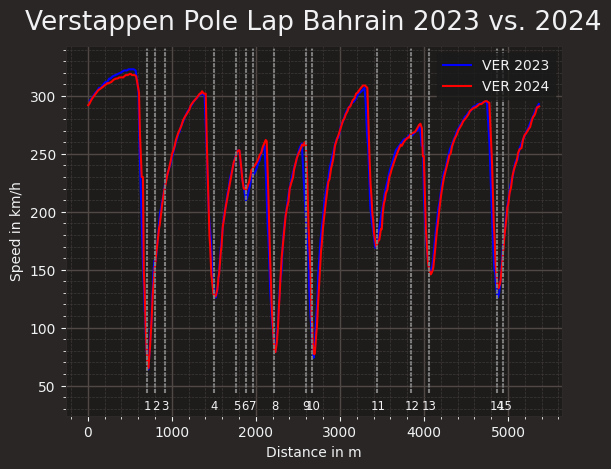

In [35]:
team_color = fastf1.plotting.team_color(fastest_lap['Team'])
team_color2 = fastf1.plotting.team_color(fastest_lap2['Team'])

fig, ax = plt.subplots()
ax.plot(car_data['Distance'], car_data['Speed'],
        color='blue', label='VER 2023')
ax.plot(car_data2['Distance'], car_data2['Speed'],
        color='red', label='VER 2024')

# Draw vertical dotted lines at each corner that range from slightly below the
# minimum speed to slightly above the maximum speed.
v_min = car_data['Speed'].min()
v_max = car_data['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

# Draw vertical dotted lines at each corner that range from slightly below the
# minimum speed to slightly above the maximum speed.
v_min2 = car_data2['Speed'].min()
v_max2 = car_data2['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min2-20, ymax=v_max2+20,
          linestyles='dotted', colors='grey')

# Plot the corner number just below each vertical line.
# For corners that are very close together, the text may overlap. A more
# complicated approach would be necessary to reliably prevent this.
for _, corner in circuit_info2.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt,
            va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Manually adjust the y-axis limits to include the corner numbers, because
# Matplotlib does not automatically account for text that was manually added.
ax.set_ylim([v_min - 40, v_max + 20])

plt.title('Verstappen Pole Lap Bahrain 2023 vs. 2024')
plt.show()

In [38]:
session = fastf1.get_session(2024, 'Canadian Grand Prix', 'Q')
session.load(messages=True)

core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '4', '81', '3', '14', '44', '22', '18',

In [39]:
fastf1.api.race_control_messages()

AttributeError: module 'fastf1' has no attribute 'api'